In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
customer_data = pd.read_csv('/content/drive/MyDrive/Pythonclass/QVI_purchase_behaviour.csv')
transaction_data = pd.read_excel('/content/drive/MyDrive/Pythonclass/QVI_transaction_data.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Display the first few rows of each dataset
print("Customer Data:")
print(customer_data.head())

print("\nTransaction Data:")
print(transaction_data.head())



Customer Data:
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream

Transaction Data:
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3

In [19]:
# High-level summary of customer data
print("\nCustomer Data Summary:")
print(customer_data.describe(include='all'))
print(customer_data.info())



Customer Data Summary:
        LYLTY_CARD_NBR LIFESTAGE PREMIUM_CUSTOMER
count     7.263700e+04     72637            72637
unique             NaN         7                3
top                NaN  RETIREES       Mainstream
freq               NaN     14805            29245
mean      1.361859e+05       NaN              NaN
std       8.989293e+04       NaN              NaN
min       1.000000e+03       NaN              NaN
25%       6.620200e+04       NaN              NaN
50%       1.340400e+05       NaN              NaN
75%       2.033750e+05       NaN              NaN
max       2.373711e+06       NaN              NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usa

In [20]:
# High-level summary of transaction data
print("\nTransaction Data Summary:")
print(transaction_data.describe(include='all'))
print(transaction_data.info())



Transaction Data Summary:
                 DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count   264836.000000  264836.00000    2.648360e+05  2.648360e+05   
unique            NaN           NaN             NaN           NaN   
top               NaN           NaN             NaN           NaN   
freq              NaN           NaN             NaN           NaN   
mean     43464.036260     135.08011    1.355495e+05  1.351583e+05   
std        105.389282      76.78418    8.057998e+04  7.813303e+04   
min      43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%      43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%      43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%      43555.000000     203.00000    2.030942e+05  2.027012e+05   
max      43646.000000     272.00000    2.373711e+06  2.415841e+06   

             PROD_NBR                               PROD_NAME       PROD_QTY  \
count   264836.000000                                  264836  2

In [21]:
# Check for missing values
print("\nMissing Values in Customer Data:")
print(customer_data.isnull().sum())

print("\nMissing Values in Transaction Data:")
print(transaction_data.isnull().sum())



Missing Values in Customer Data:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Missing Values in Transaction Data:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [22]:
# Check for duplicates
print("\nDuplicate Rows in Customer Data:")
print(customer_data.duplicated().sum())

print("\nDuplicate Rows in Transaction Data:")
print(transaction_data.duplicated().sum())



Duplicate Rows in Customer Data:
0

Duplicate Rows in Transaction Data:
1


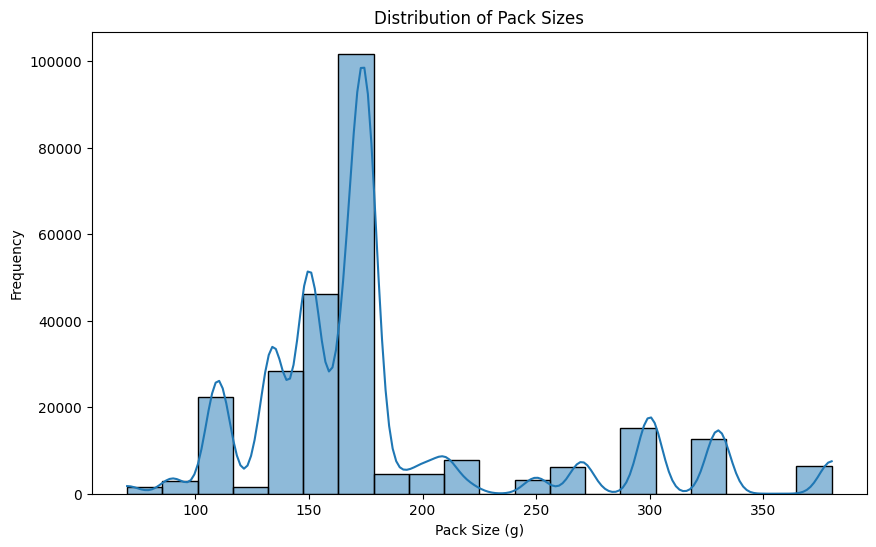

In [23]:
# Drop duplicate rows in transaction data
transaction_data = transaction_data.drop_duplicates()

# Derive new features
# Extract pack size from product name and convert to float
transaction_data['pack_size'] = transaction_data['PROD_NAME'].str.extract('(\d+)').astype(float)

# Extract brand name from product name
transaction_data['brand_name'] = transaction_data['PROD_NAME'].str.extract('([A-Za-z]+)')

# Convert DATE to datetime
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')

# Descriptive analysis
plt.figure(figsize=(10, 6))
sns.histplot(transaction_data['pack_size'], bins=20, kde=True)
plt.title('Distribution of Pack Sizes')
plt.xlabel('Pack Size (g)')
plt.ylabel('Frequency')
plt.show()


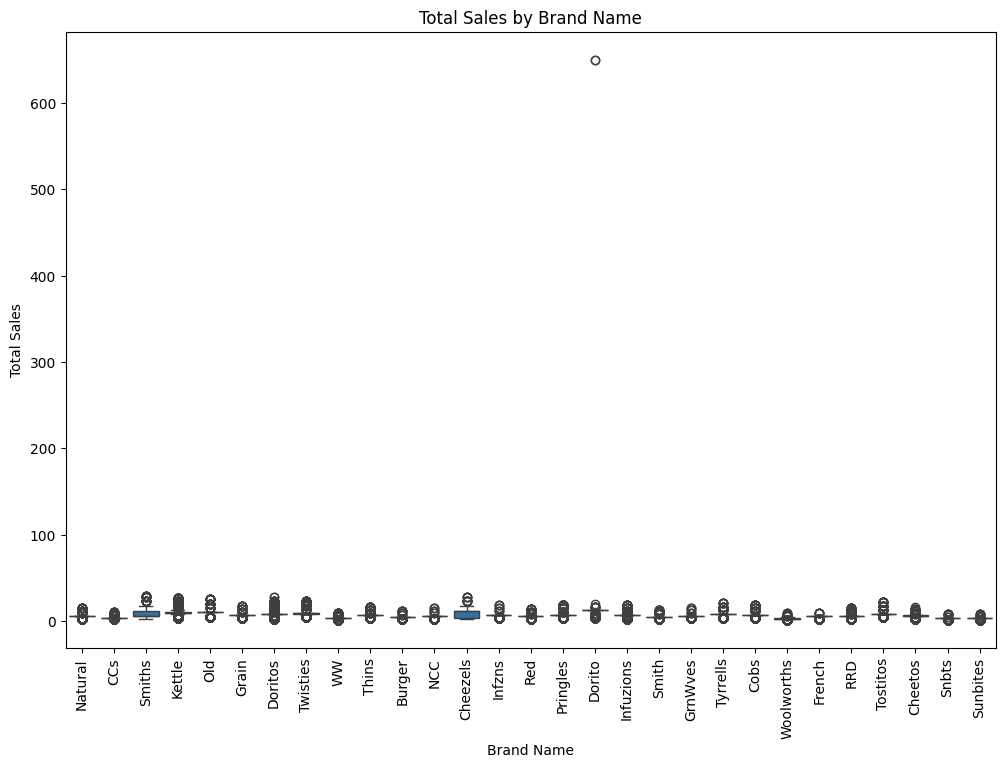

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='brand_name', y='TOT_SALES', data=transaction_data)
plt.title('Total Sales by Brand Name')
plt.xlabel('Brand Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


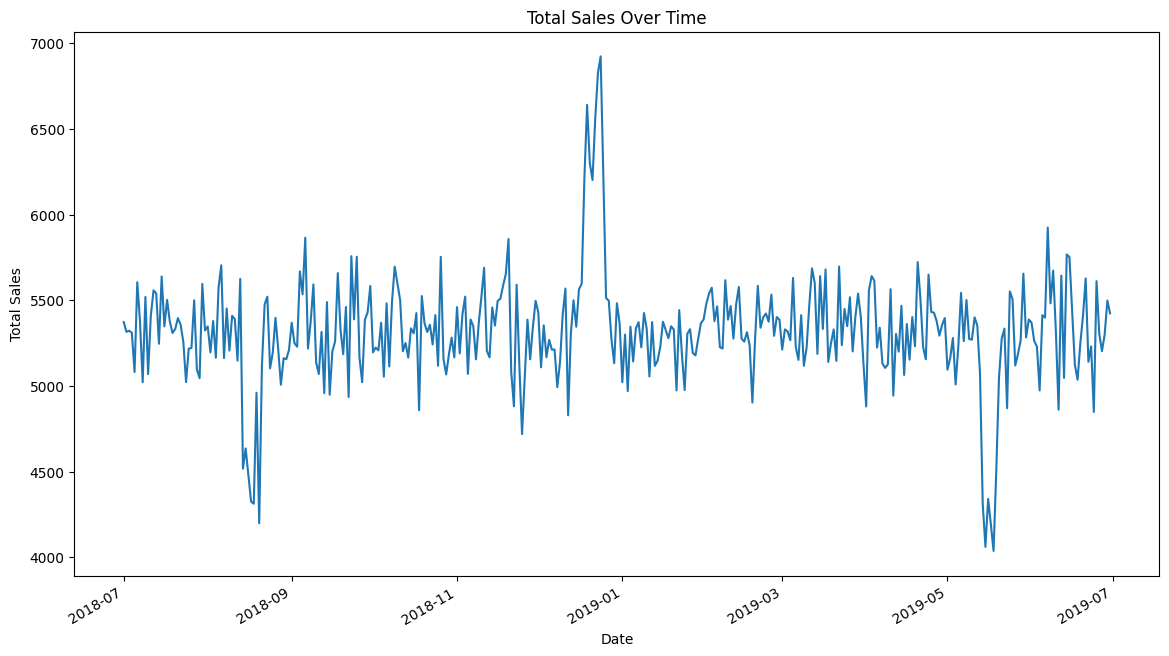

In [25]:
# Sales over time
plt.figure(figsize=(14, 8))
transaction_data.groupby('DATE')['TOT_SALES'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()





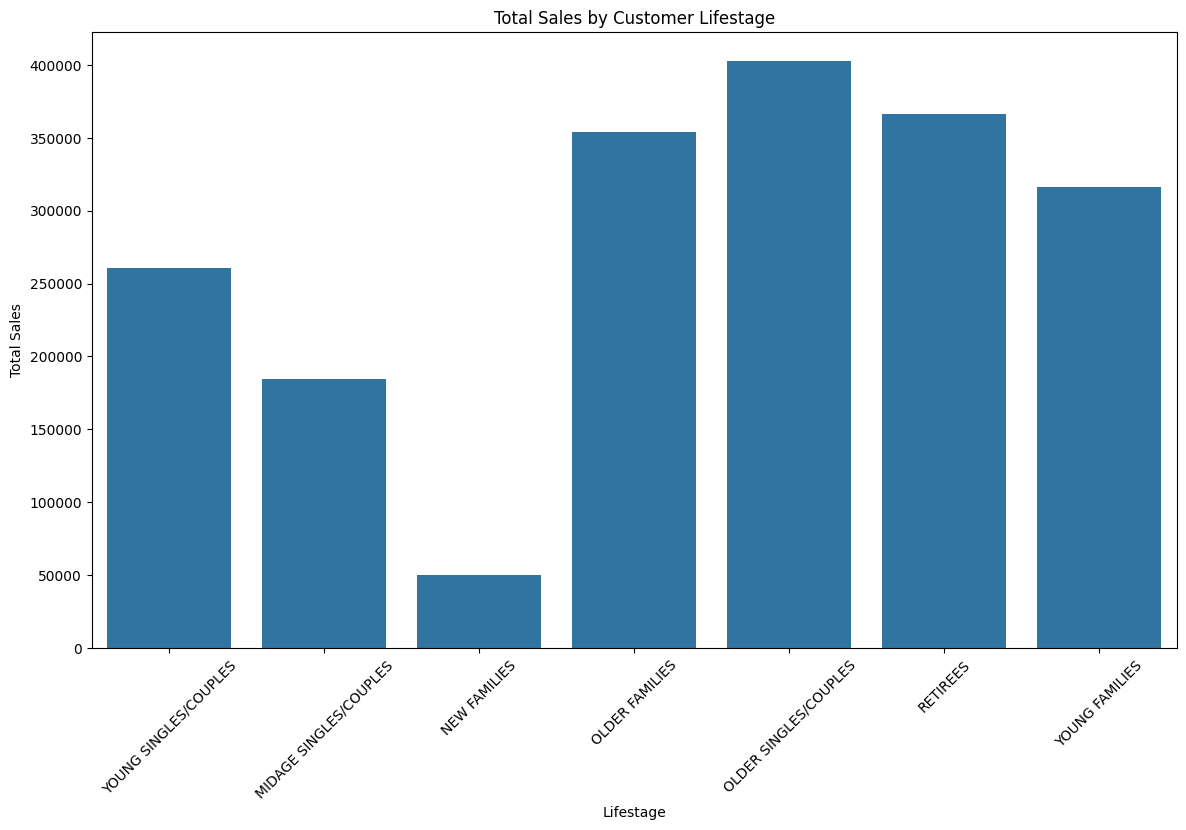

In [26]:
# Merge customer and transaction data
merged_data = pd.merge(transaction_data, customer_data, how='left', on='LYLTY_CARD_NBR')

# Sales by Lifestage
plt.figure(figsize=(14, 8))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', data=merged_data, estimator=sum, errorbar=None)
plt.title('Total Sales by Customer Lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()



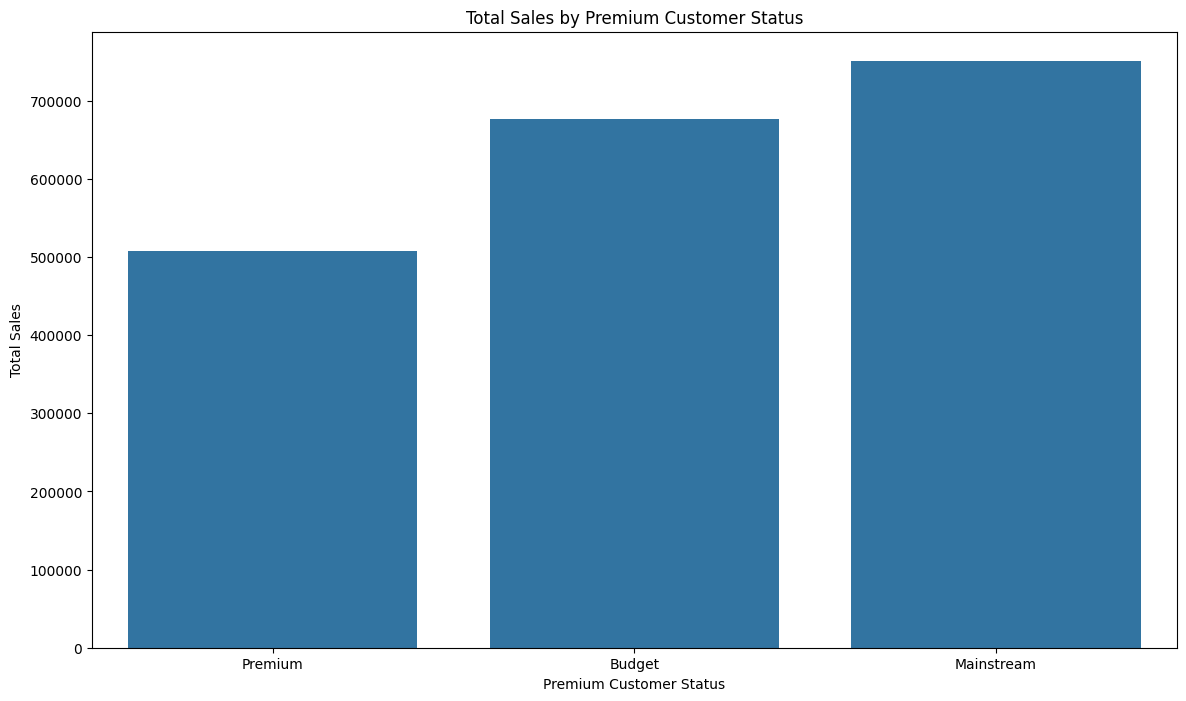

In [27]:

# Sales by Premium Customer Status
plt.figure(figsize=(14, 8))
sns.barplot(x='PREMIUM_CUSTOMER', y='TOT_SALES', data=merged_data, estimator=sum, errorbar=None)
plt.title('Total Sales by Premium Customer Status')
plt.xlabel('Premium Customer Status')
plt.ylabel('Total Sales')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


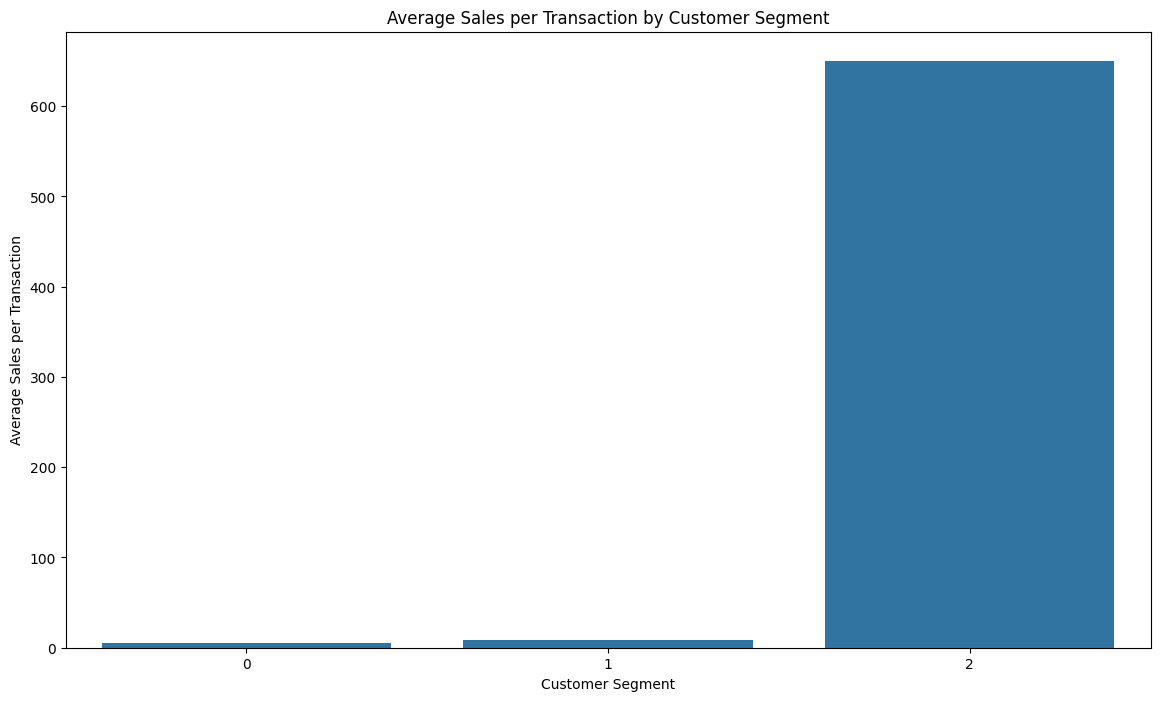

In [28]:
# Customer segmentation using K-means clustering
from sklearn.cluster import KMeans

# Selecting features for clustering
features = merged_data[['TOT_SALES', 'PROD_QTY']]
kmeans = KMeans(n_clusters=3, random_state=123)
merged_data['segment'] = kmeans.fit_predict(features)

# Average Sales per Transaction by Customer Segment
plt.figure(figsize=(14, 8))
sns.barplot(x='segment', y='TOT_SALES', data=merged_data, estimator=np.mean, errorbar=None)
plt.title('Average Sales per Transaction by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Sales per Transaction')
plt.show()



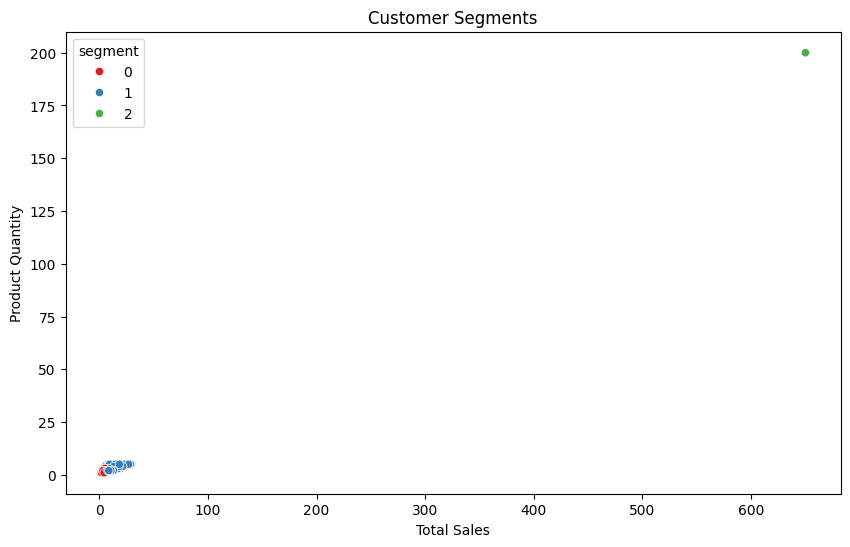

In [29]:
# Visualize segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TOT_SALES', y='PROD_QTY', hue='segment', data=merged_data, palette='Set1')
plt.title('Customer Segments')
plt.xlabel('Total Sales')
plt.ylabel('Product Quantity')
plt.show()



In [30]:
# Save results to PDF
import matplotlib.backends.backend_pdf

pdf = matplotlib.backends.backend_pdf.PdfPages("/content/drive/MyDrive/Pythonclass/analysis_results.pdf")

fig = plt.figure(figsize=(10, 6))
sns.histplot(transaction_data['pack_size'], bins=20, kde=True)
plt.title('Distribution of Pack Sizes')
plt.xlabel('Pack Size (g)')
plt.ylabel('Frequency')
pdf.savefig(fig)
plt.close()


In [31]:
fig = plt.figure(figsize=(12, 8))
sns.boxplot(x='brand_name', y='TOT_SALES', data=transaction_data)
plt.title('Total Sales by Brand Name')
plt.xlabel('Brand Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
pdf.savefig(fig)
plt.close()


fig = plt.figure(figsize=(14, 8))
transaction_data.groupby('DATE')['TOT_SALES'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
pdf.savefig(fig)
plt.close()

fig = plt.figure(figsize=(14, 8))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', data=merged_data, estimator=sum, errorbar=None)
plt.title('Total Sales by Customer Lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
pdf.savefig(fig)
plt.close()

fig = plt.figure(figsize=(14, 8))
sns.barplot(x='PREMIUM_CUSTOMER', y='TOT_SALES', data=merged_data, estimator=sum, errorbar=None)
plt.title('Total Sales by Premium Customer Status')
plt.xlabel('Premium Customer Status')
plt.ylabel('Total Sales')
pdf.savefig(fig)
plt.close()

fig = plt.figure(figsize=(14, 8))
sns.barplot(x='segment', y='TOT_SALES', data=merged_data, estimator=np.mean, errorbar=None)
plt.title('Average Sales per Transaction by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Sales per Transaction')
pdf.savefig(fig)
plt.close()

fig = plt.figure(figsize=(10, 6))
sns.scatterplot(x='TOT_SALES', y='PROD_QTY', hue='segment', data=merged_data, palette='Set1')
plt.title('Customer Segments')
plt.xlabel('Total Sales')
plt.ylabel('Product Quantity')
pdf.savefig(fig)
plt.close()

pdf.close()

print("Analysis results saved to analysis_results.pdf")


Analysis results saved to analysis_results.pdf
